# Title: Project 7:  Apply Supervised Machine Learning - Simple Linear Regression

## Project Introduction

*Author:* Priyanka Naskar 

*GitHub repository*:  https://github.com/Priyankanaskar/Datafun-07-applied

*Import Dependencies*

In [1028]:
import matplotlib
from matplotlib import pyplot as plt
import pandas
import pyarrow
import scipy
from scipy import stats
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

# Part 1 - Chart a Straight Line

*Linear Relationships*

To understand the general concept of a linear relationship, consider Fahrenheit and Celsius temperatures. Given a Fahrenheit temperature, we can calculate the corresponding Celsius temperature using the following formula: c = 5 / 9 * (f - 32)

Plotting Fahrenheit temperatures and their corresponding Celsius temperatures produces a straight line. To show this, let’s first create a lambda for the preceding formula and use it to calculate the Celsius equivalents of the Fahrenheit temperatures 0–100 in 10-degree increments. We store each Fahrenheit/Celsius pair as a tuple in temps

In [1029]:
# Creating a lambda for our Celsius formula
c = lambda f: 5 / 9 * (f - 32)

# Storing each Fahrenheit/Celsius pair as a tuple in temps
temps = [(f, c(f)) for f in range(0, 101, 10)]

Let’s place the data in a DataFrame, then use its plot method to display the linear relationship between the Fahrenheit and Celsius temperatures. 

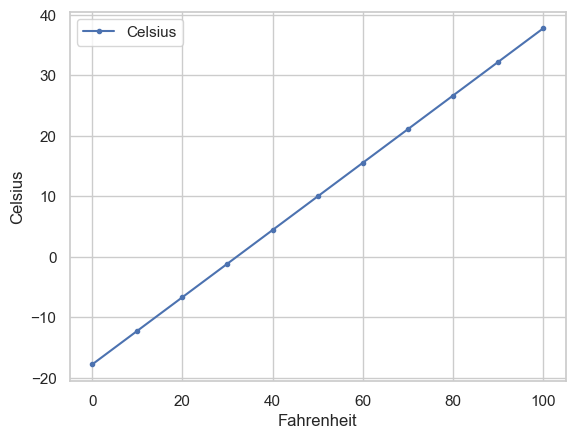

In [1030]:
# use its plot method to display the linear relationship between the Fahrenheit and Celsius temperatures

import pandas as pd

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

y_label = axes.set_ylabel('Celsius')


# Part 2 - Predict Avg High Temp in NYC in January

## Section-1

Load NY City January high temperature from a csv file into a DataFrame

In [1031]:
# load the New York City data from ave_hi_nyc_jan_1895-2018.csv:
nyc = pd.read_csv('data/ave_hi_nyc_jan_1895-2018.csv')
nyc.head(7)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4


## Section 2 - Data Inspection


Review DataFrame’s head and tail to get a sense of the data

In [1032]:
nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [1033]:
nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Section 3 - Data Cleaning

clean the data. Improve the column names and clean up the date series. Set the precision.

In [1034]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']

nyc.head(7)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4


Seaborn labels the tick marks on the x-axis with Date values. Since this example processes only January temperatures, the x-axis labels will be more readable if they do not contain 01 (for January), we’ll remove it from each Date. First, let’s check the column’s type:

In [1035]:
nyc.Date.dtype

dtype('int64')

The values are integers, so we can divide by 100 to truncate the last two digits. Recall that each column in a DataFrame is a Series. Calling Series method floordiv performs integer division on every element of the Series:

In [1036]:
nyc.Date = nyc.Date.floordiv(100)

nyc.head(7)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4


## Section 4 - Descriptive Statistics

describe() to calculate basic descriptive statistics for the dataset. 

For some quick statistics on the dataset’s temperatures, call describe on the Temperature column.

In [1037]:
# Setting precision to 2 decimal places
pd.set_option('display.precision', 2)
# Calling describe to calculate basic descriptive statistics
nyc['Temperature'].describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

## Section 5 - Build the Model

We will use the SciPy (Scientific Python) library stats module to provide function linregress, which calculates a regression line’s slope and intercept for a given set of data points to build the model for forecasting Future January Average High Temperatures

In [1038]:
# Calculating regression line's slope and intercept
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)
# Linear Regression Slope
linear_regression.slope

0.014771361132966163

In [1039]:
# Linear Regression Intercept
linear_regression.intercept

8.694993233674289

We can use these values with the simple linear regression equation for a straight line, y = mx + b, to predict the average January temperature in New York City for a given year. Let’s predict the average Fahrenheit temperature for January of 2024. In the following calculation, linear_regression.slope is m, 2024 is x (the date value for which you’d like to predict the temperature), and linear_regression.intercept is b:

In [1040]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

We also can approximate what the average temperature might have been in the years before 2024. For example, let’s approximate the average temperature for January of 2024

In [1041]:
linear_regression.slope * 2024 + linear_regression.intercept

38.5922281667978

we had data for 1895–2024. You should expect that the further you go outside this range, the less reliable the predictions will be.

## Section 6 - Visualizations

use Seaborn’s regplot function to plot each data point with the dates on the x-axis and the temperatures on the y-axis

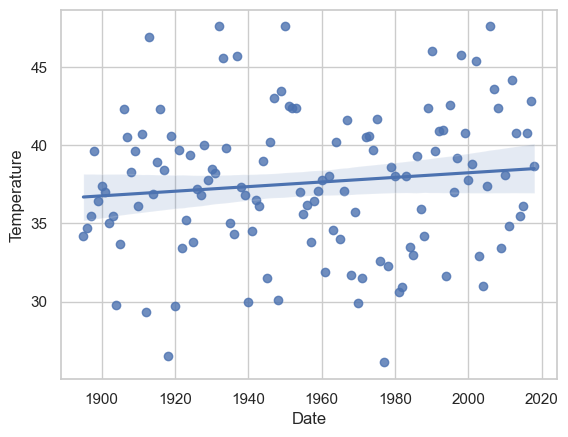

In [1042]:
#import dependencies
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

The regression line’s slope (lower at the left and higher at the right) indicates a warming trend over the last 120 years(1900-2020)

In [1043]:
axes.set_ylim(10, 70)

(10.0, 70.0)

* Customize your chart and notebook as you like to make your work clear and compelling 


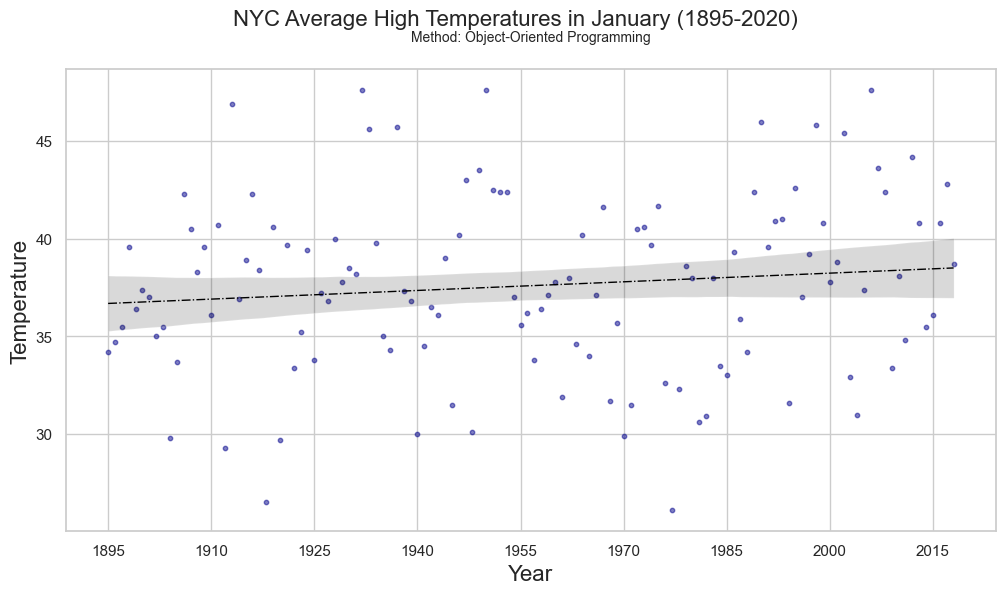

In [1044]:
# Increase the size of the plot
plt.figure(figsize=(12,6))

# Customize the scatter plot with a Seaborn theme, marker style, and regression line style
sns.set_theme(style='whitegrid')
axes = sns.regplot(x='Date', y='Temperature', data=nyc,
                   scatter_kws={"color": "darkblue", "alpha": 0.5, "s": 10},
                   line_kws={"color": "black", "lw": 1, "ls": "-."})

# Add title, subtile, and labels to the plot
plt.suptitle('NYC Average High Temperatures in January (1895-2020)', fontsize=16)
axes.set_title('Method: Object-Oriented Programming', fontsize=10, pad=20)
axes.set_xlabel('Year', fontsize=16)
axes.set_ylabel('Temperature', fontsize=16)

# Customize ticks
axes.set_xticks(range(min(nyc.Date), max(nyc.Date), 15)) 

# Display the plot
plt.show()

* Observation:

The regression line’s slope (lower at the left and higher at the right) indicates a warming trend over the last 124 years.

# Part 3 - Predict Avg High Temp in NYC in January


## Section 1 - Build the Model

*1. Use test_train_split to split the data into parts for training and testing.*

In [1045]:
from sklearn.model_selection import train_test_split
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    nyc.Date.values.reshape(-1, 1), nyc.Temperature.values,
    random_state=11)

*2. Check the shape of each data set.*

In [1046]:
X_train.shape

(93, 1)

In [1047]:
X_test.shape

(31, 1)

*3. Train the model using Linear Regression Fit*

In [1048]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

*5.View the returned coef_ and intercept_  attributes need for the line equation (y = mx + b)*

In [1049]:
predict = (lambda x: linear_regression.coef_ * x +
linear_regression.intercept_)

predict(2019)

array([38.84399018])

In [1050]:
predict(1890)

array([36.34246432])

## Section 2 - Test the Model

*Test the model as directed.*

Let’s test the model using the data in X_test and check some of the predictions throughout the dataset by displaying the predicted and expected values for every fifth element

In [1051]:
predicted = linear_regression.predict(X_test)

expected = y_test

for p, e in zip(predicted[::5], expected[::5]):
 print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Section 3 - Predict

*1. Use model to predict the "average high temp in Jan" for the year 2024*

using the coef_ as m and the intercept_ as b.

In [1052]:
predict = (lambda x: linear_regression.coef_ * x +
linear_regression.intercept_)

predict(2024)

array([38.94094855])

## Section 4 - Visualizations

*Visualizing the Dataset with the Regression Line*

Create a scatter plot of the dataset using Seaborn’s scatterplot function and Matplotlib’s plot function.

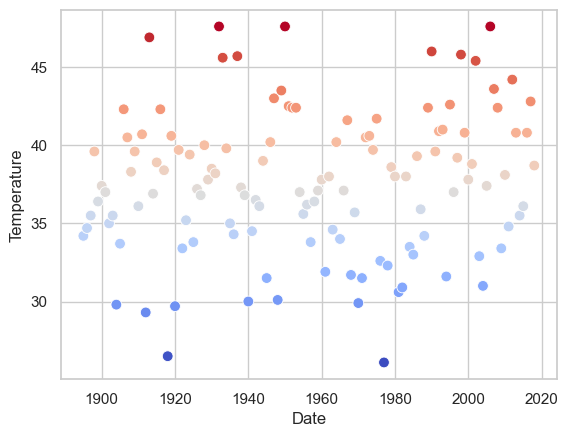

In [1053]:
import seaborn as sns

axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
hue='Temperature', palette='coolwarm', legend=False,s=60)

let’s scale the y-axis range of values

In [1054]:
axes.set_ylim(10, 70)

(10.0, 70.0)

Create an array containing the minimum and maximum date values in nyc.Date.

<Figure size 1800x1200 with 0 Axes>

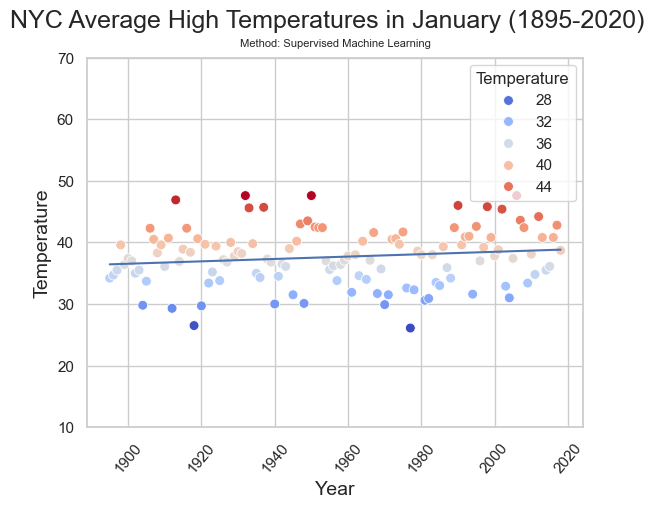

<Figure size 1800x1200 with 0 Axes>

In [1055]:
# Using scatterplot with the nyc DataFrame to display the data points
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature',
    hue='Temperature', palette='coolwarm', legend=True, s=50)

# Scaling the y-axis range of values to see the linear relationship better with regression line
axes.set_ylim(10, 70)

# Displaying the regression line
import numpy as np
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

# Producing array containing corresponding predicted values
y = predict(x)

# Rotate x-axis labels for better readability
plt.xticks(rotation=50)

# Plotting lines based on x and y arrays
import matplotlib.pyplot as plt
line = plt.plot(x, y)

# Add title, subtile, and labels to the plot
plt.suptitle('NYC Average High Temperatures in January (1895-2020)', fontsize=18)
axes.set_title('Method: Supervised Machine Learning', fontsize=8, pad=8)
axes.set_xlabel('Year', fontsize=14)
axes.set_ylabel('Temperature', fontsize=14)

plt.figure(figsize=(18, 12))

|*Observation*	|*Object-Oriented Programming*	|*Supervised Machine Learning*|
*Visualization Style and Clarity*|	Grey confidence interval around the regression line provides uncertainty context. Single color for points and a clear regression line may be more readable.|	No confidence interval shown, color gradient for points based on temperature values can give an immediate visual cue about temperature distribution.|
|*Data Presentation*|	Cleaner look with fewer distractions from primary data points and trend line.|	More colorful but may risk visual overload or misinterpretation if the color hue is not understood to represent temperature.|
*Regression Analysis*|	May include statistical tools focusing on hypothesis testing and understanding of possible regression line ranges.	Utilizes libraries like scikit-learn, focused on prediction accuracy, often used in predictive modeling contexts.|
|*Interpretation of Trends*|	Confidence band provides better context for understanding potential variability of the temperature increase trend.|	|Emphasizes individual years with higher temperatures using warmer colors, useful for highlighting specific events or outliers.|*Technical Considerations*|	More control over individual plot elements, advantageous for fine-tuning visualization details.	More data-driven, can potentially include more complex relationships, though not apparent in a simple linear trend.|
|*Contextual and Practical Implications*|	Preferred for detailed statistical analysis and publication due to control over visualization.|	More suitable for predictive analytics and quick data exploration due to data-driven nature.|